## Parallel tempering ##

I wanted to verify the implementation of my parallel tempering sampler, so I decided to use the toy multi-modal distribution presented by Darren W [here](https://darrenjw.wordpress.com/2013/09/29/parallel-tempering-and-metropolis-coupled-mcmc).

Darren also provide some R code for doing sampling, but I will be relying on my own python implementations. 

In [2]:
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from pt_sampler import *
%matplotlib inline

/Users/asifzubair/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def U0(gam, x):
    return 1.*gam*(x*x-1)**2
def curried(gam):
    def U(x):
        return U0(gam, x)
    return U

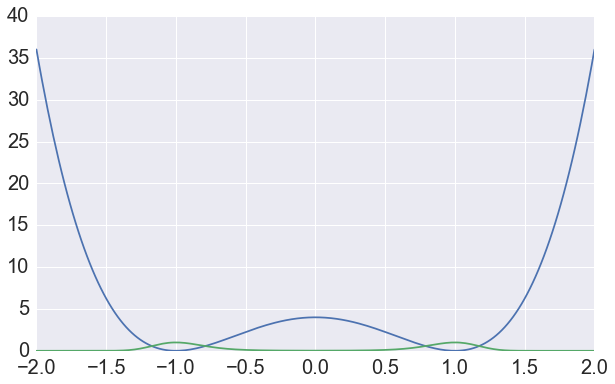

In [5]:
U16 = curried(4)
sns.set(font_scale=2)
y = np.array([U16(x) for x in np.linspace(-2,2, 200)])
plt.figure(figsize=(10, 6))
sns.plt.plot(np.linspace(-2,2, 200), np.exp(-y))

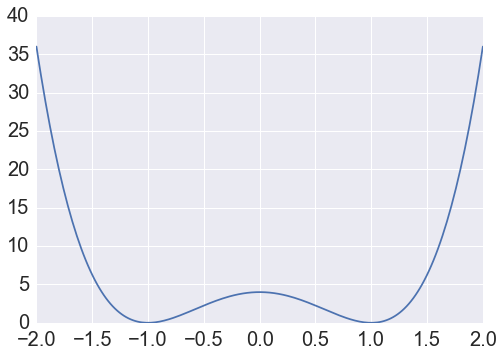

In [6]:
sns.plt.plot(np.linspace(-2,2, 200), y)

## MH Sampler ##

Let's see how the Metropolis-Hastings Sampler does:

In [5]:
pt_sampler(lambda x: -1*curried(2)(x), 100000, dir_name = "target_mh_g2", do_exchange = False, num_chains = 2)
pt_sampler(lambda x: -1*curried(4)(x), 100000, dir_name = "target_mh_g4", do_exchange = False, num_chains = 2)
pt_sampler(lambda x: -1*curried(8)(x), 100000, dir_name = "target_mh_g8", do_exchange = False, num_chains = 2)
pt_sampler(lambda x: -1*curried(16)(x), 100000, dir_name = "target_mh_g16", do_exchange = False, num_chains = 2)

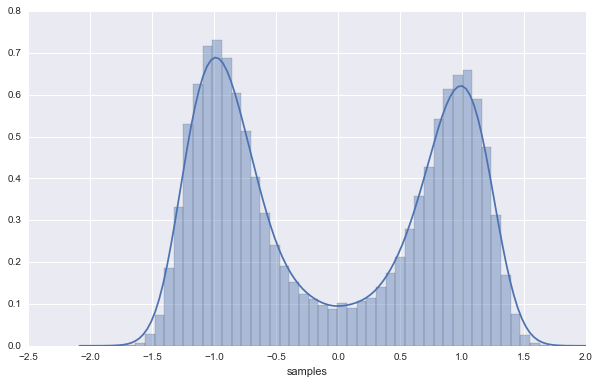

In [45]:
samples = pd.read_table("target_mh_g2/samples_dble_potn_2.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

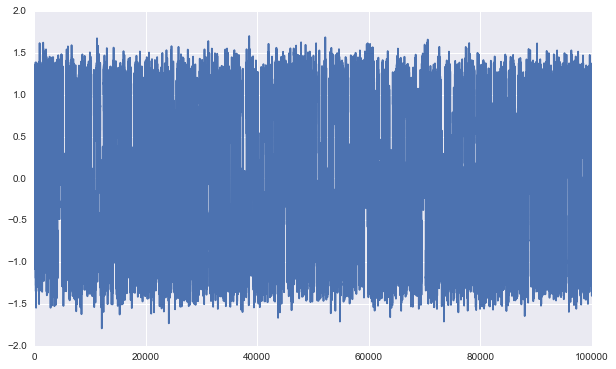

In [46]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

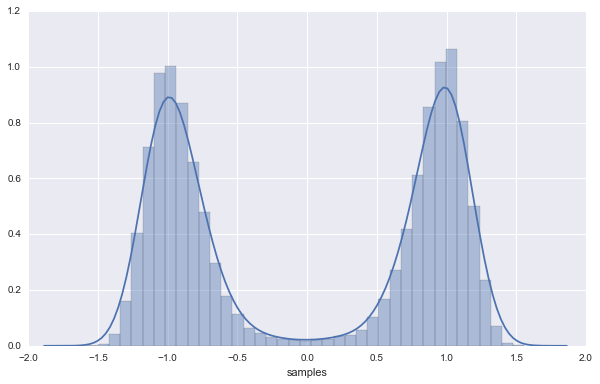

In [47]:
samples = pd.read_table("target_mh_g4/samples_dble_potn_2.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

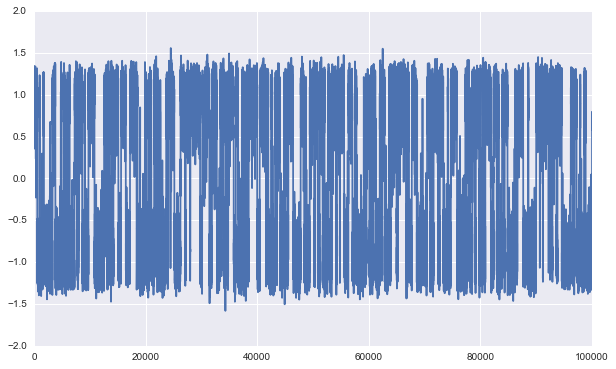

In [48]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

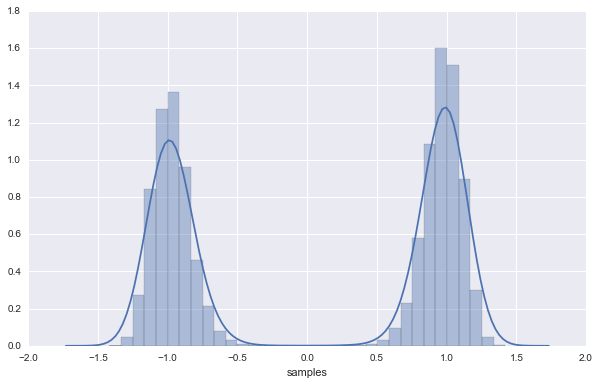

In [49]:
samples = pd.read_table("target_mh_g8/samples_dble_potn_2.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

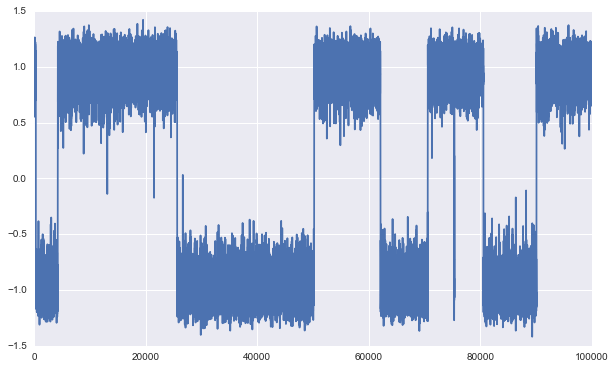

In [50]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

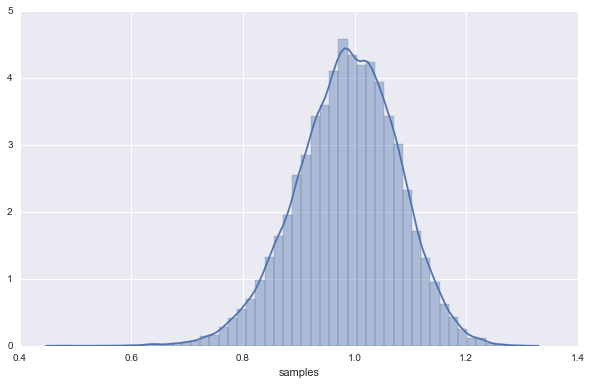

In [51]:
samples = pd.read_table("target_mh_g16/samples_dble_potn_2.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

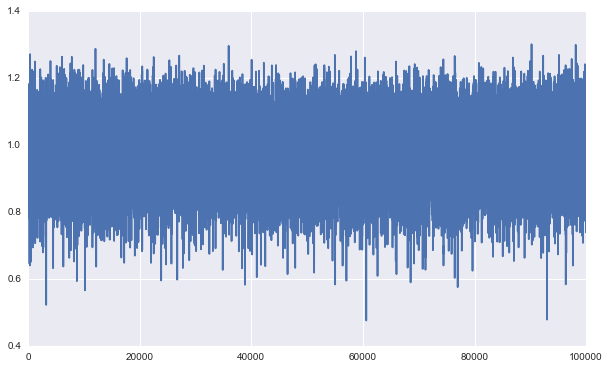

In [52]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

In [35]:
pt_sampler(lambda x: -1*curried(2)(x), 100000, dir_name = "target_pt_g2")
pt_sampler(lambda x: -1*curried(4)(x), 100000, dir_name = "target_pt_g4")
pt_sampler(lambda x: -1*curried(8)(x), 100000, dir_name = "target_pt_g8")
pt_sampler(lambda x: -1*curried(16)(x), 100000, dir_name = "target_pt_g16")

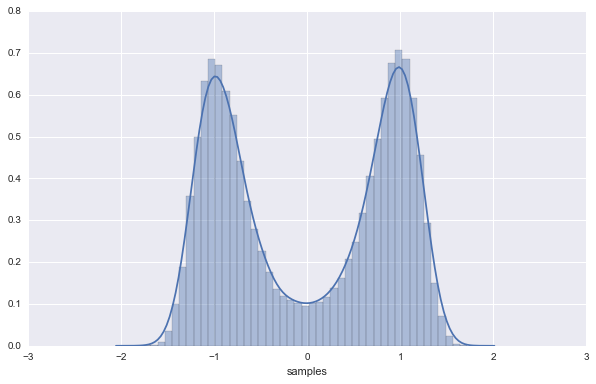

In [53]:
samples = pd.read_table("target_pt_g2/samples_dble_potn_10.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

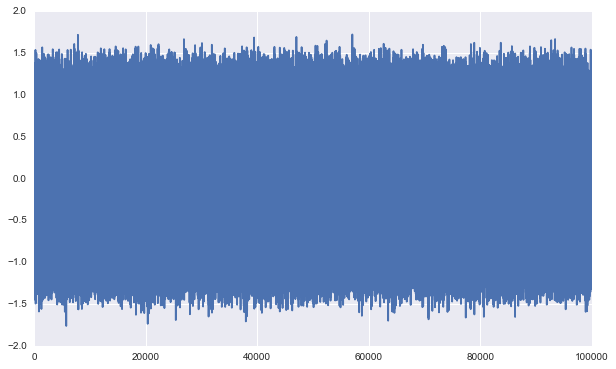

In [54]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

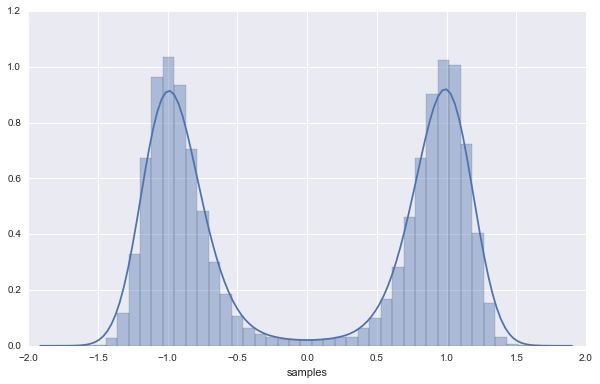

In [55]:
samples = pd.read_table("target_pt_g4/samples_dble_potn_10.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

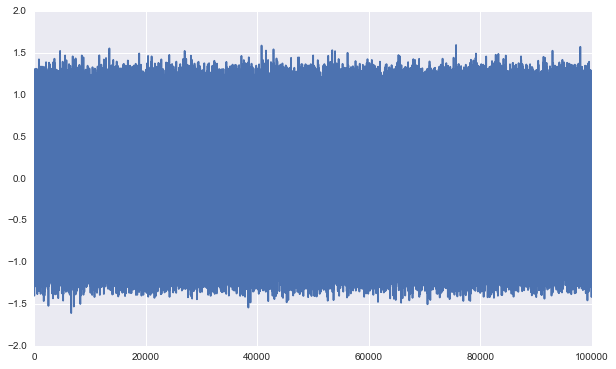

In [56]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

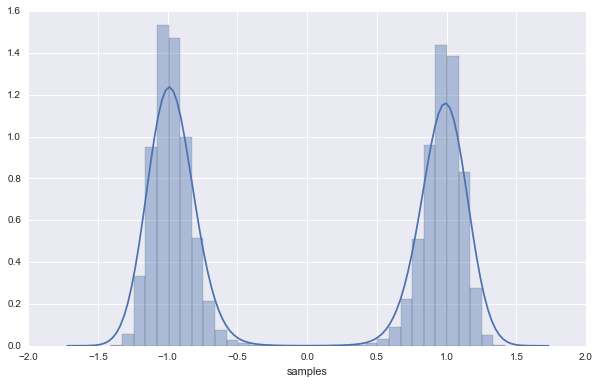

In [57]:
samples = pd.read_table("target_pt_g8/samples_dble_potn_10.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

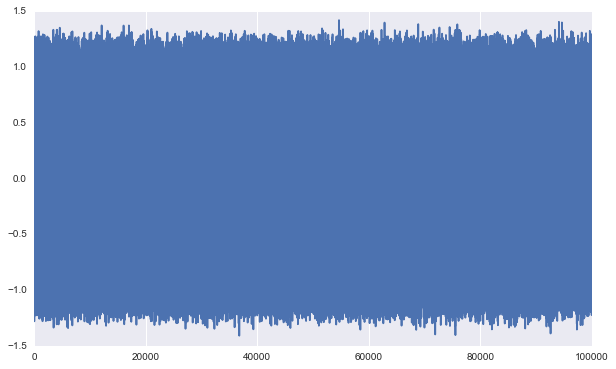

In [58]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)

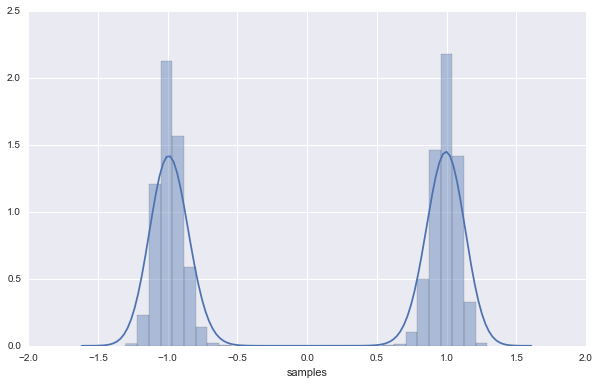

In [59]:
samples = pd.read_table("target_pt_g16/samples_dble_potn_10.csv")["samples"]
plt.figure(figsize=(10, 6))
sns.distplot(samples)

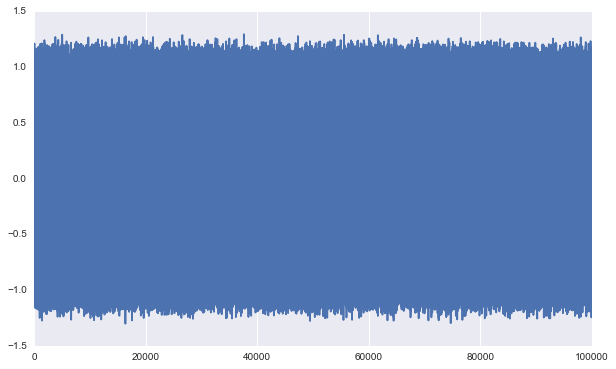

In [60]:
plt.figure(figsize=(10, 6))
sns.plt.plot(samples)